<a href="https://colab.research.google.com/github/dennismwau-1/project/blob/main/Copy_of_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project Submission

Please fill out:
* Student name:
* Student pace: self paced / part time / full time
* Scheduled project review date/time:
* Instructor name:
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

Project Overview
For this project, you will use exploratory data analysis to generate insights for a business stakeholder.

Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

In [5]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing data

In [7]:
df1=pd.read_csv('/content/bom.movie_gross.csv.gz')

df2=pd.read_csv('/content/imdb.title.basics.csv.gz')
df3=pd.read_csv('/content/imdb.title.ratings.csv.gz')


In [ ]:
df1.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [ ]:
df2.head()


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [ ]:
df3.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


merging the data

In [8]:
#merging our data
df2_and_df3 = pd.merge(df2, df3, on='tconst',how='inner')
df2_and_df3.head()







,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [9]:
#renaming 'title' to match 'original_title' to enable easy merging
df1.rename(columns={'title':'original_title'}, inplace=True)
df1.head()

,original_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [10]:
#merging df2_and_df3 unto df1
imdb_data = pd.merge(df1, df2_and_df3, on='original_title', how='inner')
imdb_data.head()

,original_title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690


In [ ]:
imdb_data.columns


DATA CLEANING

validity

In [11]:
#dropping irrelevant columns
imdb_data.drop(['runtime_minutes', ], axis=1, inplace=True)
imdb_data.head()


,original_title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,start_year,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,2010,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,2010,"Action,Adventure,Sci-Fi",7.0,657690


completness

In [12]:
#checking for null values
imdb_data.isnull().sum()

original_title      0
studio              3
domestic_gross     18
foreign_gross     874
year                0
tconst              0
primary_title       0
start_year          0
genres              4
averagerating       0
numvotes            0
dtype: int64

In [13]:
#replacing missing values with a dash
imdb_data.fillna('-', inplace=True)
imdb_data.head()

,original_title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,start_year,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,2010,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,2010,"Action,Adventure,Sci-Fi",7.0,657690


In [14]:
#checking if we have replaced our null values
imdb_data.isnull().sum()


original_title    0
studio            0
domestic_gross    0
foreign_gross     0
year              0
tconst            0
primary_title     0
start_year        0
genres            0
averagerating     0
numvotes          0
dtype: int64

Accuracy

In [15]:
#checking for duplicates
imdb_data.duplicated().sum()

0

Uniformity

In [16]:
#changing the column names to lower case
imdb_data.columns = imdb_data.columns.str.lower()
imdb_data.head()

,original_title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,start_year,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,2010,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,2010,"Action,Adventure,Sci-Fi",7.0,657690


In [17]:
#checking the unifomity in column values
imdb_data.nunique()


original_title    2136
studio             190
domestic_gross    1323
foreign_gross      922
year                 9
tconst            2447
primary_title     2150
start_year          10
genres             294
averagerating       70
numvotes          2244
dtype: int64

PYTHON ANALYSIS

In [18]:
#most watched movies
imdb_data['original_title'].value_counts().head(10)

original_title
Split             6
Eden              6
Aurora            6
Truth             5
Mama              5
The Journey       5
Anna              5
The Other Side    5
The Gambler       4
Truth or Dare     4
Name: count, dtype: int64

DATA VISUALIZATION

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


most watched movie

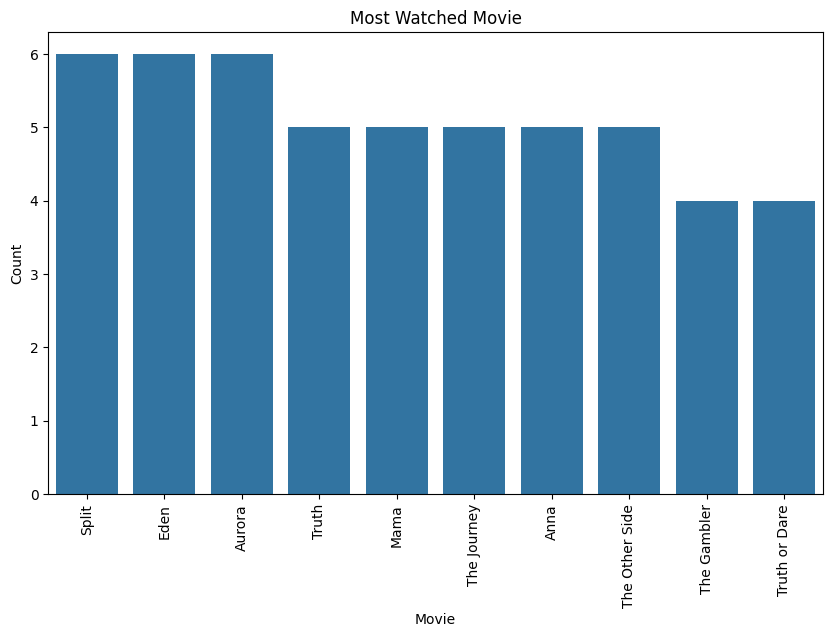

In [ ]:
#most popular movies
plt.figure(figsize=(10, 6))
top_movies = imdb_data['original_title'].value_counts().head(10)
sns.barplot(x=top_movies.index, y=top_movies.values)


plt.title('Most Watched Movie')
plt.xlabel('Movie')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#missing values
missing_values = imdb_data.isnull().sum()
print(missing_values)

original_title       0
studio               3
domestic_gross      18
foreign_gross      874
year                 0
tconst               0
primary_title        0
start_year           0
runtime_minutes     45
genres               4
averagerating        0
numvotes             0
dtype: int64


<Axes: >

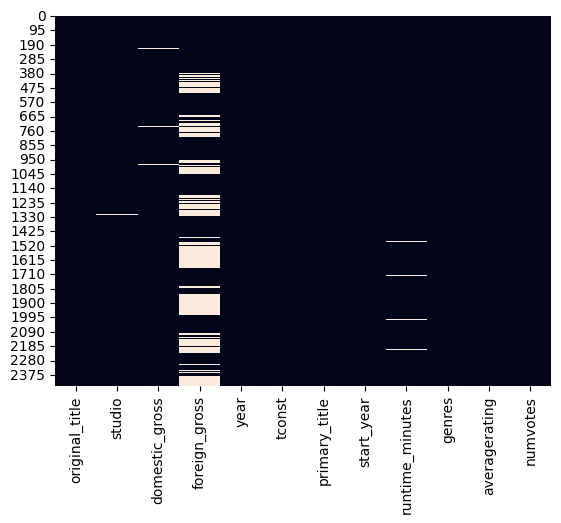

In [ ]:
sns.heatmap(imdb_data.isnull(), cbar=False)

<Axes: xlabel='start_year', ylabel='Count'>

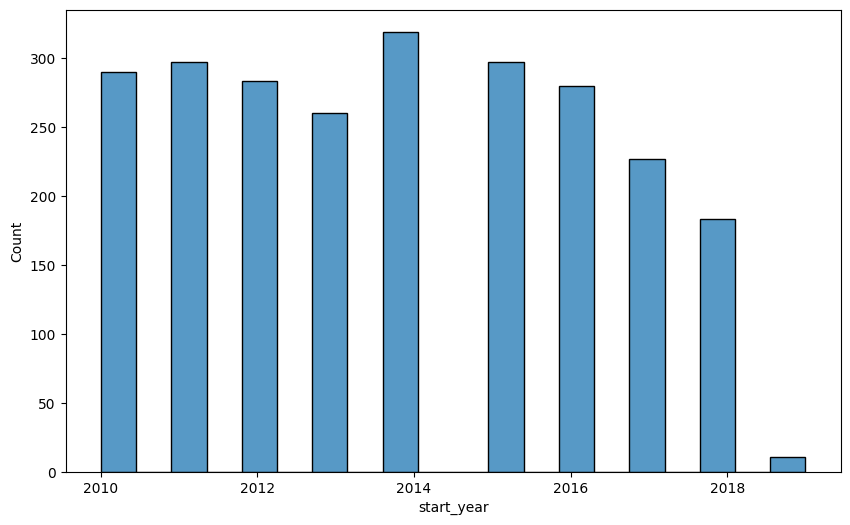

In [ ]:
#year with the most number of votes
plt.figure(figsize=(10, 6))
sns.histplot(data=imdb_data, x='start_year', bins=20)
plt.title('Year with the Most Number of Votes')
plt.xlabel('Year')
plt.ylabel('Number of Votes')
plt.show()

In [ ]:
imdb_data.columns

Index(['original_title', 'studio', 'domestic_gross', 'foreign_gross', 'year',
       'tconst', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes'],
      dtype='object')

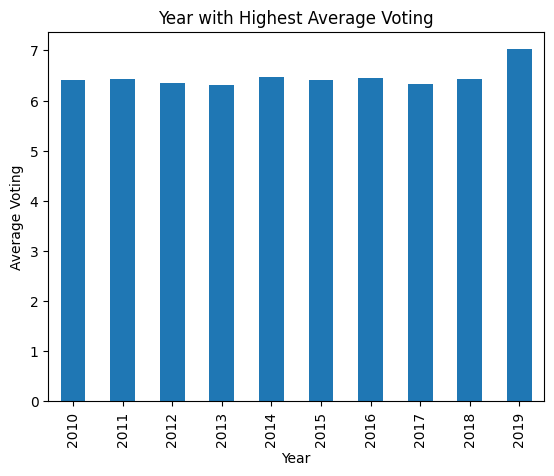

In [ ]:
#year with highest average voting
imdb_data.groupby('start_year')['averagerating'].mean().plot(kind='bar')
plt.title('Year with Highest Average Voting')
plt.xlabel('Year')
plt.ylabel('Average Voting')
plt.show()

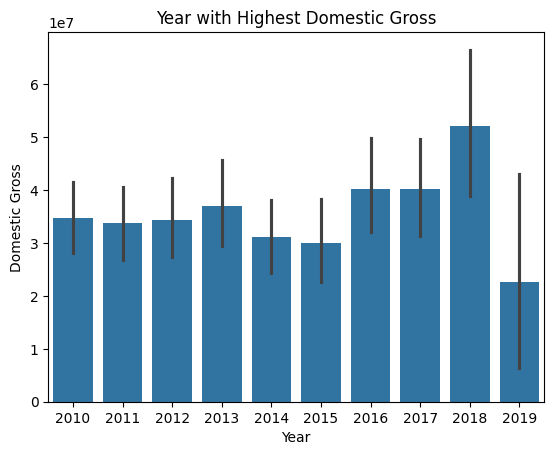

In [ ]:
#year with the highest domestic gross
sns.barplot(x='start_year', y='domestic_gross', data=imdb_data)
plt.title('Year with Highest Domestic Gross')
plt.xlabel('Year')
plt.ylabel('Domestic Gross')
plt.show()

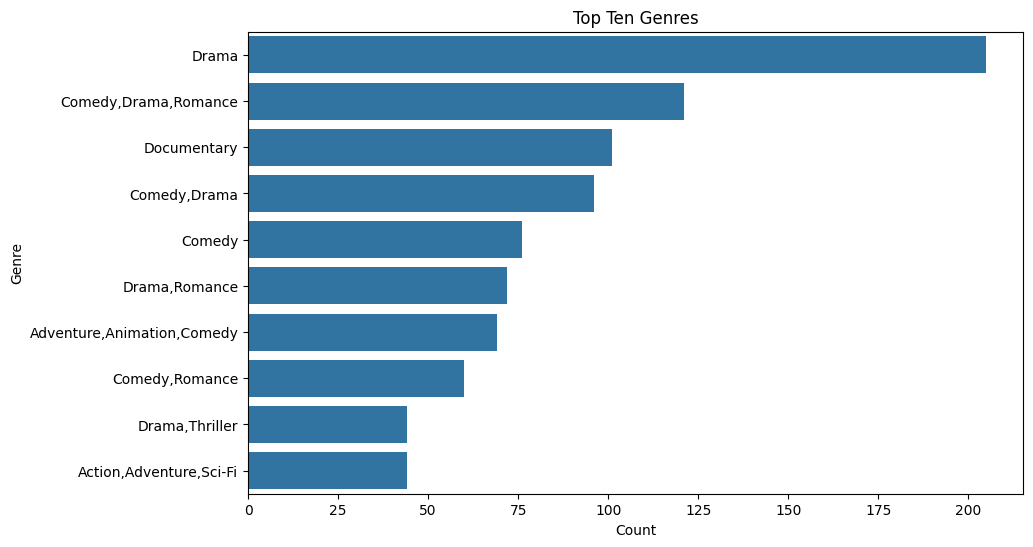

In [ ]:
#top ten genres
imdb_data['genres'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_genres = imdb_data['genres'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top Ten Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


In [ ]:
#top ten lenghly movies
imdb_data.columns



Index(['original_title', 'studio', 'domestic_gross', 'foreign_gross', 'year',
       'tconst', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes'],
      dtype='object')

In [ ]:
imdb_data.nlargest(10, 'runtime_minutes')['original_title']

(963               Bhaag Milkha Bhaag
 1783    M.S. Dhoni: The Untold Story
 500                           Aurora
 815          The Wolf of Wall Street
 682                 Jab Tak Hai Jaan
 694                        Agneepath
 557                      Cloud Atlas
 1504                 Dil Dhadakne Do
 1741                          Sultan
 198                      The Tempest
 Name: original_title, dtype: object,
 963     186.0
 1783    184.0
 500     181.0
 815     180.0
 682     176.0
 694     174.0
 557     172.0
 1504    170.0
 1741    170.0
 198     169.0
 Name: runtime_minutes, dtype: float64)

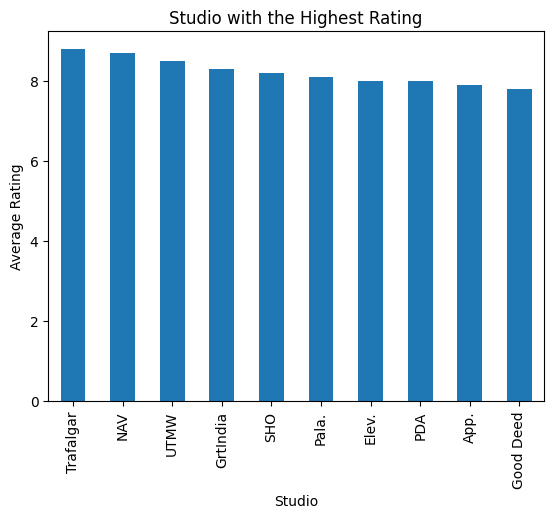

In [23]:
#studio with the highest rating
imdb_data.groupby('studio')['averagerating'].mean().sort_values(ascending=False).head(10).plot(kind='bar')  #top ten studios
plt.title('Studio with the Highest Rating')
plt.xlabel('Studio')
plt.ylabel('Average Rating')
plt.show()







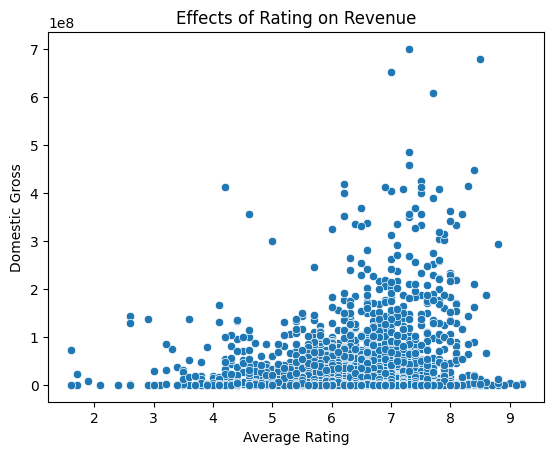

In [ ]:
#effects of rating on revenue
sns.scatterplot(x='averagerating', y='domestic_gross', data=imdb_data)
plt.title('Effects of Rating on Revenue')
plt.xlabel('Average Rating')
plt.ylabel('Domestic Gross')
plt.show()

